In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Netflix Dataset.csv")
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [4]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [5]:
df.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(2)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe(include = "all")

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7787,7787,7787,5399,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


### Data Analysis

Text(0.5, 1.0, 'Count Category Distribution')

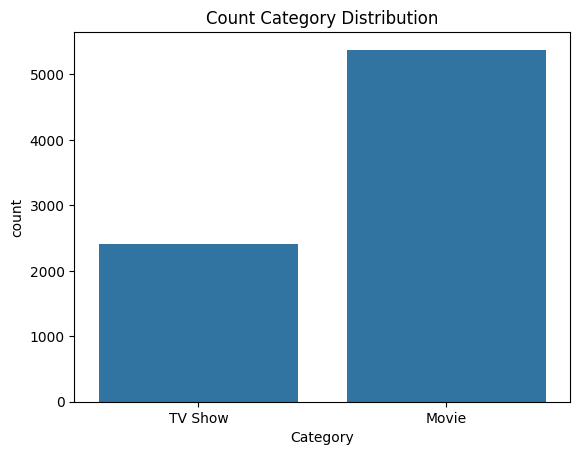

In [9]:
# Countplot use for see count of things

sns.countplot(data = df, x = "Category")
plt.title("Count Category Distribution")

Text(0.5, 1.0, 'Top 10 Countries on Netflix')

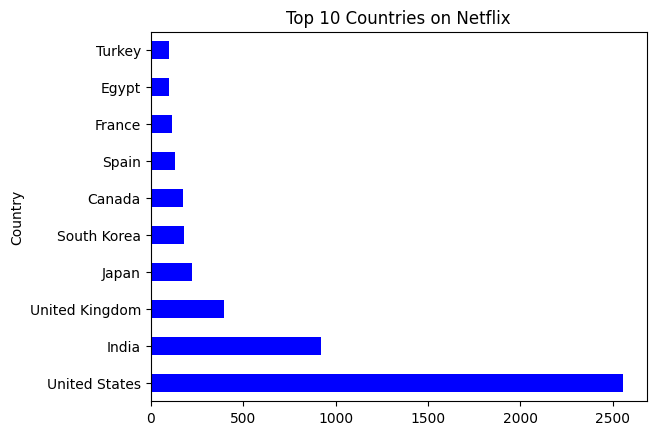

In [10]:
top_countries = df["Country"].value_counts().head(10)
top_countries.plot(kind="barh", color = "blue")
plt.title("Top 10 Countries on Netflix")

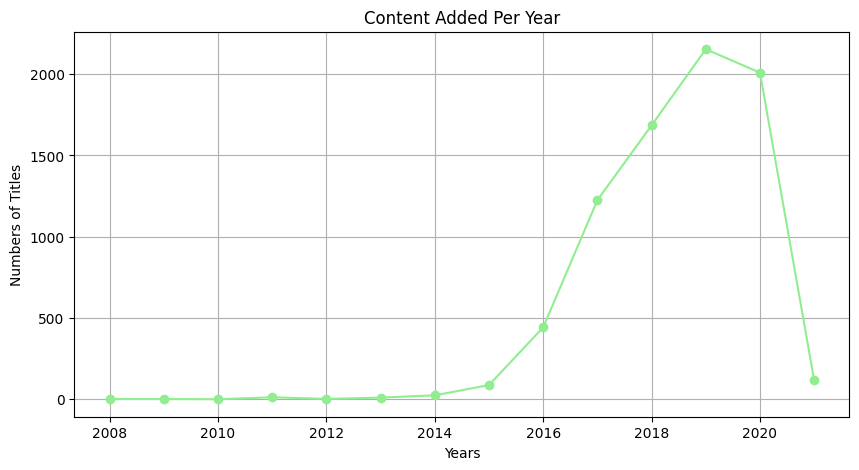

In [11]:
# Removes any whiteapces
df["Release_Date"] = df["Release_Date"].astype(str).str.strip()

# converts datetime to purely text
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors = "coerce")

df["Year_added"] = df["Release_Date"].dt.year

df["Year_added"].value_counts().sort_index().plot(kind = "line" ,marker = "o", figsize=(10, 5), color = "lightGreen")
plt.title("Content Added Per Year")
plt.xlabel("Years")
plt.ylabel("Numbers of Titles")
plt.grid(True)
plt.show()
 

Text(0.5, 1.0, 'Distribution of Content Rating')

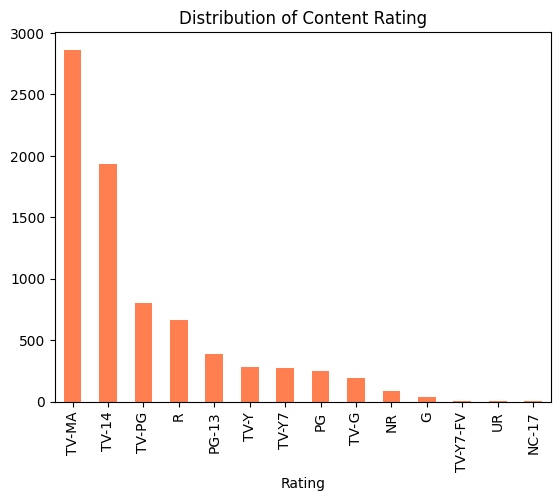

In [12]:
df["Rating"].value_counts().plot(kind = "bar", color = "coral")
plt.title("Distribution of Content Rating")

Text(0.5, 1.0, 'Top 10 Directors on Netflix')

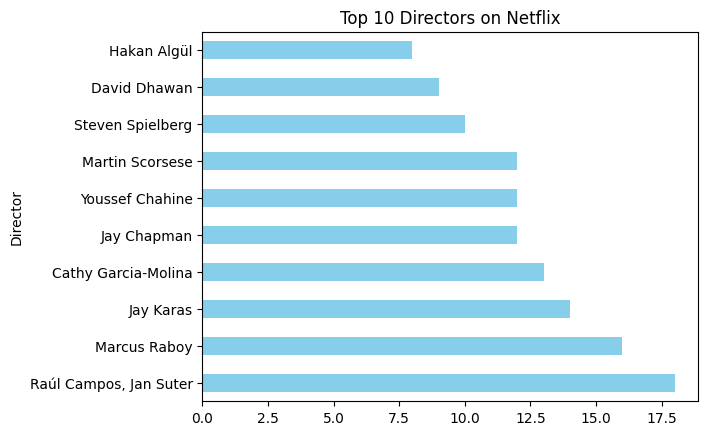

In [13]:
df["Director"].value_counts().head(10).plot(kind = "barh", color = "skyblue")
plt.title("Top 10 Directors on Netflix")

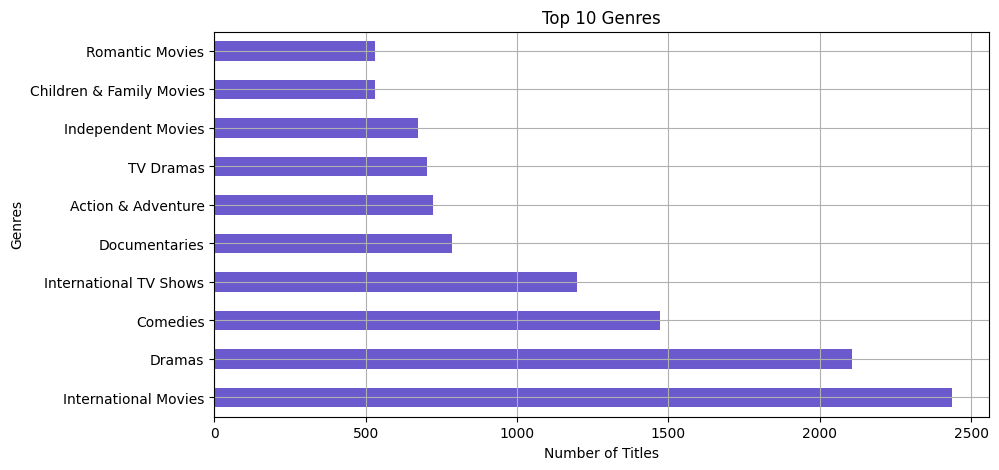

In [14]:
genres = df["Type"].dropna()

# The explode() function in pandas is used when you have a column where each row contains a list
#  (or multiple values inside one cell), and you want to "split" them so that each value gets its own separate row.

all_genres = df["Type"].str.split(",").explode().str.strip()

top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10, 5))
top_genres.plot(kind = "barh", color = "slateblue")
plt.title("Top 10 Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genres")
plt.grid(True)
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\musma\AppData\Local\Temp\ipykernel_8952\683246403.py:4: SyntaxWarning: invalid escape sequence '\d'
  movies["Minutes"] = movies["Duration"].str.extract('(\d+)').astype(float)
C:\Users\musma\AppData\Local\Temp\ipykernel_8952\683246403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["Minutes"] = movies["Duration"].str.extract('(\d+)').astype(float)


Text(0.5, 1.0, 'Distribution of Movies Duration')

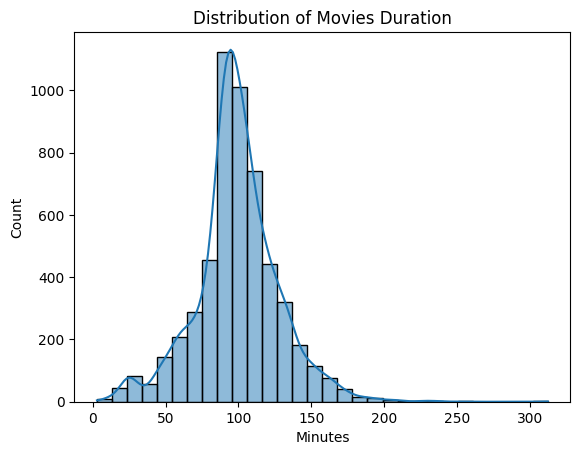

In [15]:
movies = df[df["Category"] == "Movie"]
tv_shows = df[df["Category"] == "Tv Show"]

movies["Minutes"] = movies["Duration"].str.extract('(\d+)').astype(float)
sns.histplot(movies["Minutes"].dropna(), bins = 30, kde = True)
plt.title("Distribution of Movies Duration")

Text(0.5, 1.0, 'Top 10 Cast of Netflix')

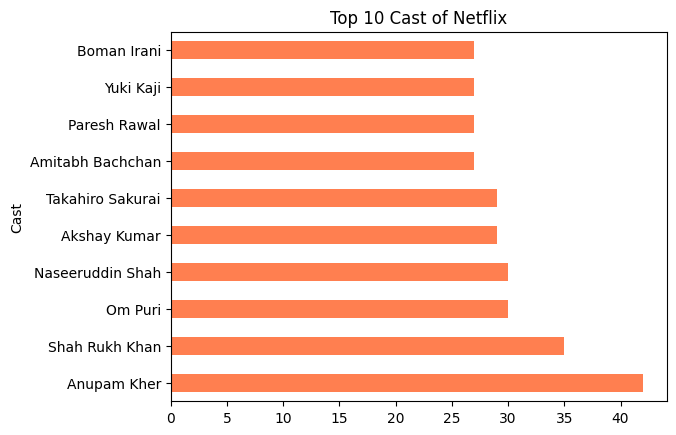

In [16]:
cast = df["Cast"].dropna()

all_cast = df["Cast"].str.split(",").explode().str.strip()

all_cast.value_counts().head(10).plot(kind = "barh", color = "coral")
plt.title("Top 10 Cast of Netflix")

In [31]:
df_filtered = df[(df["Year_added"] >= 2008) & (df["Year_added"] <= 2021)]

director_per_year = df_filtered.groupby(["Year_added", "Director"])["Title"].count().reset_index()

director_per_year

,Year_added,Director,Title
0,2008.0,Sorin Dan Mihalcescu,1
1,2009.0,Joe Dante,1
2,2009.0,Ole Bornedal,1
3,2010.0,Jim Monaco,1
4,2011.0,Arthur Allan Seidelman,1
...,...,...,...
4661,2021.0,Steven Spielberg,2
4662,2021.0,Stuart Rosenberg,1
4663,2021.0,Sung Do-jun,1
4664,2021.0,Tiller Russell,1


In [32]:
unique_directors = df_filtered.groupby(["Year_added"])["Director"].nunique().reset_index()

unique_directors

,Year_added,Director
0,2008.0,1
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,7
6,2014.0,18
7,2015.0,55
8,2016.0,230
9,2017.0,786
